<a href="https://colab.research.google.com/github/Lucas-Petrus/DS-Unit-2-Applied-Modeling/blob/master/BuildWeekLucasPetrusNBAdataLS_DS_231_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Model Interpretation

You will use your portfolio project dataset for all assignments this sprint.

## Assignment

Complete these tasks for your project, and document your work.

- [ ] Continue to iterate on your project: data cleaning, exploratory visualization, feature engineering, modeling.
- [ ] Make at least 1 partial dependence plot to explain your model.
- [ ] Make at least 1 Shapley force plot to explain an individual prediction.
- [ ] **Share at least 1 visualization (of any type) on Slack!**

If you aren't ready to make these plots with your own dataset, you can practice these objectives with any dataset you've worked with previously. Example solutions are available for Partial Dependence Plots with the Tanzania Waterpumps dataset, and Shapley force plots with the Titanic dataset. (These datasets are available in the data directory of this repository.)

Please be aware that **multi-class classification** will result in multiple Partial Dependence Plots (one for each class), and multiple sets of Shapley Values (one for each class).

The score I would get for just guessing would be 50.00% accuracy

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/Lucas-Petrus/DS-Unit-2-Applied-Modeling/master/data/nba.games.stats.csv%20-%20Sheet1.csv')

In [4]:
df.head()

,Unnamed: 0,Team,Game,Date,Home,Opponent,WINorLOSS,TeamPoints,OpponentPoints,FieldGoals,FieldGoalsAttempted,FieldGoals.,X3PointShots,X3PointShotsAttempted,X3PointShots.,FreeThrows,FreeThrowsAttempted,FreeThrows.,OffRebounds,TotalRebounds,Assists,Steals,Blocks,Turnovers,TotalFouls,Opp.FieldGoals,Opp.FieldGoalsAttempted,Opp.FieldGoals.,Opp.3PointShots,Opp.3PointShotsAttempted,Opp.3PointShots.,Opp.FreeThrows,Opp.FreeThrowsAttempted,Opp.FreeThrows.,Opp.OffRebounds,Opp.TotalRebounds,Opp.Assists,Opp.Steals,Opp.Blocks,Opp.Turnovers,Opp.TotalFouls
0,1,ATL,1,2014-10-29,Away,TOR,L,102,109,40,80,0.500,13,22,0.591,9,17,0.529,10,42,26,6,8,17,24,37,90,0.411,8,26,0.308,27,33,0.818,16,48,26,13,9,9,22
1,2,ATL,2,2014-11-01,Home,IND,W,102,92,35,69,0.507,7,20,0.350,25,33,0.758,3,37,26,10,6,12,20,31,81,0.383,12,32,0.375,18,21,0.857,11,44,25,5,5,18,26
2,3,ATL,3,2014-11-05,Away,SAS,L,92,94,38,92,0.413,8,25,0.320,8,11,0.727,10,37,26,14,5,13,25,31,69,0.449,5,17,0.294,27,38,0.711,11,50,25,7,9,19,15
3,4,ATL,4,2014-11-07,Away,CHO,L,119,122,43,93,0.462,13,33,0.394,20,26,0.769,7,38,28,8,3,19,33,48,97,0.495,6,21,0.286,20,27,0.741,11,51,31,6,7,19,30
4,5,ATL,5,2014-11-08,Home,NYK,W,103,96,33,81,0.407,9,22,0.409,28,36,0.778,12,41,18,10,5,8,17,40,84,0.476,8,21,0.381,8,11,0.727,13,44,26,2,6,15,29


In [5]:
df = df.drop(columns={'Unnamed: 0'}, axis=1)

In [6]:
df = df.drop(columns={'TeamPoints','OpponentPoints','Game','FieldGoals',
                      'FieldGoals.','X3PointShots','X3PointShots.','FreeThrows',
                      'Opp.FieldGoals','Opp.FieldGoals.','Opp.3PointShots',
                      'Opp.3PointShots.','Opp.FreeThrows'}, axis=1,)

In [7]:
df.head()

,Team,Date,Home,Opponent,WINorLOSS,FieldGoalsAttempted,X3PointShotsAttempted,FreeThrowsAttempted,FreeThrows.,OffRebounds,TotalRebounds,Assists,Steals,Blocks,Turnovers,TotalFouls,Opp.FieldGoalsAttempted,Opp.3PointShotsAttempted,Opp.FreeThrowsAttempted,Opp.FreeThrows.,Opp.OffRebounds,Opp.TotalRebounds,Opp.Assists,Opp.Steals,Opp.Blocks,Opp.Turnovers,Opp.TotalFouls
0,ATL,2014-10-29,Away,TOR,L,80,22,17,0.529,10,42,26,6,8,17,24,90,26,33,0.818,16,48,26,13,9,9,22
1,ATL,2014-11-01,Home,IND,W,69,20,33,0.758,3,37,26,10,6,12,20,81,32,21,0.857,11,44,25,5,5,18,26
2,ATL,2014-11-05,Away,SAS,L,92,25,11,0.727,10,37,26,14,5,13,25,69,17,38,0.711,11,50,25,7,9,19,15
3,ATL,2014-11-07,Away,CHO,L,93,33,26,0.769,7,38,28,8,3,19,33,97,21,27,0.741,11,51,31,6,7,19,30
4,ATL,2014-11-08,Home,NYK,W,81,22,36,0.778,12,41,18,10,5,8,17,84,21,11,0.727,13,44,26,2,6,15,29


In [8]:
df.rename(columns={'WINorLOSS':'WINNER'}, inplace=True)

In [9]:
df.head()

,Team,Date,Home,Opponent,WINNER,FieldGoalsAttempted,X3PointShotsAttempted,FreeThrowsAttempted,FreeThrows.,OffRebounds,TotalRebounds,Assists,Steals,Blocks,Turnovers,TotalFouls,Opp.FieldGoalsAttempted,Opp.3PointShotsAttempted,Opp.FreeThrowsAttempted,Opp.FreeThrows.,Opp.OffRebounds,Opp.TotalRebounds,Opp.Assists,Opp.Steals,Opp.Blocks,Opp.Turnovers,Opp.TotalFouls
0,ATL,2014-10-29,Away,TOR,L,80,22,17,0.529,10,42,26,6,8,17,24,90,26,33,0.818,16,48,26,13,9,9,22
1,ATL,2014-11-01,Home,IND,W,69,20,33,0.758,3,37,26,10,6,12,20,81,32,21,0.857,11,44,25,5,5,18,26
2,ATL,2014-11-05,Away,SAS,L,92,25,11,0.727,10,37,26,14,5,13,25,69,17,38,0.711,11,50,25,7,9,19,15
3,ATL,2014-11-07,Away,CHO,L,93,33,26,0.769,7,38,28,8,3,19,33,97,21,27,0.741,11,51,31,6,7,19,30
4,ATL,2014-11-08,Home,NYK,W,81,22,36,0.778,12,41,18,10,5,8,17,84,21,11,0.727,13,44,26,2,6,15,29


In [10]:
df['WINNER'] = df['WINNER'] == 'W'

In [11]:
df.head()

,Team,Date,Home,Opponent,WINNER,FieldGoalsAttempted,X3PointShotsAttempted,FreeThrowsAttempted,FreeThrows.,OffRebounds,TotalRebounds,Assists,Steals,Blocks,Turnovers,TotalFouls,Opp.FieldGoalsAttempted,Opp.3PointShotsAttempted,Opp.FreeThrowsAttempted,Opp.FreeThrows.,Opp.OffRebounds,Opp.TotalRebounds,Opp.Assists,Opp.Steals,Opp.Blocks,Opp.Turnovers,Opp.TotalFouls
0,ATL,2014-10-29,Away,TOR,False,80,22,17,0.529,10,42,26,6,8,17,24,90,26,33,0.818,16,48,26,13,9,9,22
1,ATL,2014-11-01,Home,IND,True,69,20,33,0.758,3,37,26,10,6,12,20,81,32,21,0.857,11,44,25,5,5,18,26
2,ATL,2014-11-05,Away,SAS,False,92,25,11,0.727,10,37,26,14,5,13,25,69,17,38,0.711,11,50,25,7,9,19,15
3,ATL,2014-11-07,Away,CHO,False,93,33,26,0.769,7,38,28,8,3,19,33,97,21,27,0.741,11,51,31,6,7,19,30
4,ATL,2014-11-08,Home,NYK,True,81,22,36,0.778,12,41,18,10,5,8,17,84,21,11,0.727,13,44,26,2,6,15,29


In [12]:
df['Home'] = df['Home'] =='Home'

In [13]:
df.head()

,Team,Date,Home,Opponent,WINNER,FieldGoalsAttempted,X3PointShotsAttempted,FreeThrowsAttempted,FreeThrows.,OffRebounds,TotalRebounds,Assists,Steals,Blocks,Turnovers,TotalFouls,Opp.FieldGoalsAttempted,Opp.3PointShotsAttempted,Opp.FreeThrowsAttempted,Opp.FreeThrows.,Opp.OffRebounds,Opp.TotalRebounds,Opp.Assists,Opp.Steals,Opp.Blocks,Opp.Turnovers,Opp.TotalFouls
0,ATL,2014-10-29,False,TOR,False,80,22,17,0.529,10,42,26,6,8,17,24,90,26,33,0.818,16,48,26,13,9,9,22
1,ATL,2014-11-01,True,IND,True,69,20,33,0.758,3,37,26,10,6,12,20,81,32,21,0.857,11,44,25,5,5,18,26
2,ATL,2014-11-05,False,SAS,False,92,25,11,0.727,10,37,26,14,5,13,25,69,17,38,0.711,11,50,25,7,9,19,15
3,ATL,2014-11-07,False,CHO,False,93,33,26,0.769,7,38,28,8,3,19,33,97,21,27,0.741,11,51,31,6,7,19,30
4,ATL,2014-11-08,True,NYK,True,81,22,36,0.778,12,41,18,10,5,8,17,84,21,11,0.727,13,44,26,2,6,15,29


In [14]:
df.isnull().sum()

Team                        0
Date                        0
Home                        0
Opponent                    0
WINNER                      0
FieldGoalsAttempted         0
X3PointShotsAttempted       0
FreeThrowsAttempted         0
FreeThrows.                 0
OffRebounds                 0
TotalRebounds               0
Assists                     0
Steals                      0
Blocks                      0
Turnovers                   0
TotalFouls                  0
Opp.FieldGoalsAttempted     0
Opp.3PointShotsAttempted    0
Opp.FreeThrowsAttempted     0
Opp.FreeThrows.             0
Opp.OffRebounds             0
Opp.TotalRebounds           0
Opp.Assists                 0
Opp.Steals                  0
Opp.Blocks                  0
Opp.Turnovers               0
Opp.TotalFouls              0
dtype: int64

In [15]:
df.describe()

,FieldGoalsAttempted,X3PointShotsAttempted,FreeThrowsAttempted,FreeThrows.,OffRebounds,TotalRebounds,Assists,Steals,Blocks,Turnovers,TotalFouls,Opp.FieldGoalsAttempted,Opp.3PointShotsAttempted,Opp.FreeThrowsAttempted,Opp.FreeThrows.,Opp.OffRebounds,Opp.TotalRebounds,Opp.Assists,Opp.Steals,Opp.Blocks,Opp.Turnovers,Opp.TotalFouls
count,9840.000000,9840.000000,9840.000000,9840.000000,9840.000000,9840.000000,9840.000000,9840.000000,9840.000000,9840.000000,9840.000000,9840.000000,9840.000000,9840.000000,9840.000000,9840.000000,9840.000000,9840.000000,9840.000000,9840.000000,9840.000000,9840.000000
mean,84.902439,25.623679,22.749390,0.762395,10.287602,43.520630,22.546545,7.750508,4.827642,13.638618,20.058537,84.902439,25.623679,22.749390,0.762395,10.287602,43.520630,22.546545,7.750508,4.827642,13.638618,20.058537
std,7.130043,7.102501,7.390451,0.104297,3.807120,6.410428,5.122989,2.958886,2.536845,3.869543,4.317611,7.130043,7.102501,7.390451,0.104297,3.807120,6.410428,5.122989,2.958886,2.536845,3.869543,4.317611
min,60.000000,4.000000,1.000000,0.143000,0.000000,20.000000,6.000000,0.000000,0.000000,2.000000,7.000000,60.000000,4.000000,1.000000,0.143000,0.000000,20.000000,6.000000,0.000000,0.000000,2.000000,7.000000
25%,80.000000,21.000000,18.000000,0.696000,8.000000,39.000000,19.000000,6.000000,3.000000,11.000000,17.000000,80.000000,21.000000,18.000000,0.696000,8.000000,39.000000,19.000000,6.000000,3.000000,11.000000,17.000000
50%,85.000000,25.000000,22.000000,0.769000,10.000000,43.000000,22.000000,8.000000,5.000000,13.000000,20.000000,85.000000,25.000000,22.000000,0.769000,10.000000,43.000000,22.000000,8.000000,5.000000,13.000000,20.000000
75%,89.000000,30.000000,27.000000,0.833000,13.000000,48.000000,26.000000,10.000000,6.000000,16.000000,23.000000,89.000000,30.000000,27.000000,0.833000,13.000000,48.000000,26.000000,10.000000,6.000000,16.000000,23.000000
max,129.000000,61.000000,64.000000,1.000000,38.000000,81.000000,47.000000,21.000000,18.000000,29.000000,42.000000,129.000000,61.000000,64.000000,1.000000,38.000000,81.000000,47.000000,21.000000,18.000000,29.000000,42.000000


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9840 entries, 0 to 9839
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Team                      9840 non-null   object 
 1   Date                      9840 non-null   object 
 2   Home                      9840 non-null   bool   
 3   Opponent                  9840 non-null   object 
 4   WINNER                    9840 non-null   bool   
 5   FieldGoalsAttempted       9840 non-null   int64  
 6   X3PointShotsAttempted     9840 non-null   int64  
 7   FreeThrowsAttempted       9840 non-null   int64  
 8   FreeThrows.               9840 non-null   float64
 9   OffRebounds               9840 non-null   int64  
 10  TotalRebounds             9840 non-null   int64  
 11  Assists                   9840 non-null   int64  
 12  Steals                    9840 non-null   int64  
 13  Blocks                    9840 non-null   int64  
 14  Turnover

In [17]:
df['Opponent'].unique()

array(['TOR', 'IND', 'SAS', 'CHO', 'NYK', 'UTA', 'MIA', 'CLE', 'LAL',
       'DET', 'WAS', 'NOP', 'BOS', 'BRK', 'DEN', 'PHI', 'ORL', 'CHI',
       'HOU', 'DAL', 'LAC', 'MIL', 'POR', 'MEM', 'OKC', 'MIN', 'GSW',
       'SAC', 'PHO', 'ATL'], dtype=object)

In [18]:
east = ['TOR','IND','CHO','NYK','MIA','CLE','DET',
        'WAS','BOS','BRK','PHI','ORL','CHI','MIL','ATL']

df['EastOpponent'] = df['Opponent'].isin(east)
                                         
                                         

In [19]:
west = ['SAS','UTA','LAL','NOP','DEN','HOU','DAL',
        'LAC','POR','MEM','OKC','MIN','GSW','SAC','PHO']

df['WestOpponent'] = df['Opponent'].isin(west)

In [20]:
df['DefRebound'] = df['TotalRebounds'] - df['OffRebounds']

In [21]:
df['Opp.DefRebound'] = df['Opp.TotalRebounds'] - df['Opp.OffRebounds']

In [22]:
df['X2PointShotAttempted'] = df['FieldGoalsAttempted'] - df['X3PointShotsAttempted']

In [23]:
df['Opp.2PointShotAttempted'] = df['Opp.FieldGoalsAttempted'] - df['Opp.3PointShotsAttempted']

In [24]:
df['HighFreeThrow%'] = df['FreeThrows.'] > .800

In [25]:
df['Opp.HighFreeThrow%'] = df['Opp.FreeThrows.'] >.800

In [26]:
df['HighFreeThrow%'].value_counts()

False    6310
True     3530
Name: HighFreeThrow%, dtype: int64

In [27]:
df.head()

,Team,Date,Home,Opponent,WINNER,FieldGoalsAttempted,X3PointShotsAttempted,FreeThrowsAttempted,FreeThrows.,OffRebounds,TotalRebounds,Assists,Steals,Blocks,Turnovers,TotalFouls,Opp.FieldGoalsAttempted,Opp.3PointShotsAttempted,Opp.FreeThrowsAttempted,Opp.FreeThrows.,Opp.OffRebounds,Opp.TotalRebounds,Opp.Assists,Opp.Steals,Opp.Blocks,Opp.Turnovers,Opp.TotalFouls,EastOpponent,WestOpponent,DefRebound,Opp.DefRebound,X2PointShotAttempted,Opp.2PointShotAttempted,HighFreeThrow%,Opp.HighFreeThrow%
0,ATL,2014-10-29,False,TOR,False,80,22,17,0.529,10,42,26,6,8,17,24,90,26,33,0.818,16,48,26,13,9,9,22,True,False,32,32,58,64,False,True
1,ATL,2014-11-01,True,IND,True,69,20,33,0.758,3,37,26,10,6,12,20,81,32,21,0.857,11,44,25,5,5,18,26,True,False,34,33,49,49,False,True
2,ATL,2014-11-05,False,SAS,False,92,25,11,0.727,10,37,26,14,5,13,25,69,17,38,0.711,11,50,25,7,9,19,15,False,True,27,39,67,52,False,False
3,ATL,2014-11-07,False,CHO,False,93,33,26,0.769,7,38,28,8,3,19,33,97,21,27,0.741,11,51,31,6,7,19,30,True,False,31,40,60,76,False,False
4,ATL,2014-11-08,True,NYK,True,81,22,36,0.778,12,41,18,10,5,8,17,84,21,11,0.727,13,44,26,2,6,15,29,True,False,29,31,59,63,False,False


In [28]:
df['TotalRebounds'].value_counts()

43    655
42    635
44    607
45    574
40    570
41    559
46    543
47    535
39    454
49    435
48    424
38    417
37    388
50    336
36    316
51    305
35    278
52    244
34    210
53    201
33    189
54    151
32    130
55    121
31     82
57     77
56     76
58     52
30     51
59     37
29     34
60     27
28     20
61     19
62     19
27     17
26     11
63     10
25      7
64      5
66      4
65      3
67      3
22      2
24      2
81      1
72      1
20      1
68      1
23      1
Name: TotalRebounds, dtype: int64

In [29]:
df['HighRebounds'] = df['TotalRebounds'] >= 60

In [30]:
df['OppHighRebounds'] = df['Opp.TotalRebounds'] >=60

In [31]:
df['AssistsTurnoverRatio'] = df['Assists'] / df['Turnovers']

In [32]:
df['Opp.AssistsTurnoverRatio'] = df['Opp.Assists'] / df['Opp.Turnovers']

In [33]:
df['TotalFouls'].value_counts()

19    964
20    952
18    846
21    836
22    782
17    745
23    685
16    645
24    547
15    476
25    444
14    363
26    314
13    225
27    218
12    161
28    149
29    129
11     91
30     71
31     45
10     40
32     30
33     18
9      16
34     15
35     10
8       9
36      4
37      4
7       2
41      1
42      1
38      1
39      1
Name: TotalFouls, dtype: int64

In [34]:
df['HighFoul%'] = df['TotalFouls'] >= 30

In [35]:
df['Opp.HighFoul%'] = df['Opp.TotalFouls'] >= 30

In [36]:
df['GameChangers'] = df['Steals'] + df['Blocks']

In [37]:
df['Opp.GameChangers'] = df['Opp.Steals'] + df['Opp.Blocks']

In [38]:
df.head()

,Team,Date,Home,Opponent,WINNER,FieldGoalsAttempted,X3PointShotsAttempted,FreeThrowsAttempted,FreeThrows.,OffRebounds,TotalRebounds,Assists,Steals,Blocks,Turnovers,TotalFouls,Opp.FieldGoalsAttempted,Opp.3PointShotsAttempted,Opp.FreeThrowsAttempted,Opp.FreeThrows.,Opp.OffRebounds,Opp.TotalRebounds,Opp.Assists,Opp.Steals,Opp.Blocks,Opp.Turnovers,Opp.TotalFouls,EastOpponent,WestOpponent,DefRebound,Opp.DefRebound,X2PointShotAttempted,Opp.2PointShotAttempted,HighFreeThrow%,Opp.HighFreeThrow%,HighRebounds,OppHighRebounds,AssistsTurnoverRatio,Opp.AssistsTurnoverRatio,HighFoul%,Opp.HighFoul%,GameChangers,Opp.GameChangers
0,ATL,2014-10-29,False,TOR,False,80,22,17,0.529,10,42,26,6,8,17,24,90,26,33,0.818,16,48,26,13,9,9,22,True,False,32,32,58,64,False,True,False,False,1.529412,2.888889,False,False,14,22
1,ATL,2014-11-01,True,IND,True,69,20,33,0.758,3,37,26,10,6,12,20,81,32,21,0.857,11,44,25,5,5,18,26,True,False,34,33,49,49,False,True,False,False,2.166667,1.388889,False,False,16,10
2,ATL,2014-11-05,False,SAS,False,92,25,11,0.727,10,37,26,14,5,13,25,69,17,38,0.711,11,50,25,7,9,19,15,False,True,27,39,67,52,False,False,False,False,2.000000,1.315789,False,False,19,16
3,ATL,2014-11-07,False,CHO,False,93,33,26,0.769,7,38,28,8,3,19,33,97,21,27,0.741,11,51,31,6,7,19,30,True,False,31,40,60,76,False,False,False,False,1.473684,1.631579,True,True,11,13
4,ATL,2014-11-08,True,NYK,True,81,22,36,0.778,12,41,18,10,5,8,17,84,21,11,0.727,13,44,26,2,6,15,29,True,False,29,31,59,63,False,False,False,False,2.250000,1.733333,False,False,15,8


In [39]:
df['WINNER'].value_counts(normalize='True')

True     0.5
False    0.5
Name: WINNER, dtype: float64

In [40]:
target = df['WINNER']

X = df.drop('WINNER', axis=1)

In [41]:
train = X[X['Date'] <= '2016-06-30']

In [42]:
train.shape

(4920, 42)

In [43]:
val = X[X['Date'] > '2016-06-30']
val = val[val['Date'] <= '2017-06-30']

In [44]:
val.shape

(2460, 42)

In [45]:
test = X[X['Date'] > '2017-06-30']

In [46]:
test.shape

(2460, 42)

In [47]:
y = target
X_train = train
y_train = y[y.index.isin(X_train.index)]
X_val = val
y_val = y[y.index.isin(X_val.index)]
X_test = test
y_test = y[y.index.isin(X_test.index)]

In [48]:
  !pip install category_encoders==2

     |████████████████████████████████| 92kB 2.4MB/s 


In [49]:
import pandas as pd
%matplotlib inline
import category_encoders as ce
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [50]:
###I dont feel like I did this right, this was my attempt to do a quick, easy train

pipeline = make_pipeline(
  ce.OneHotEncoder(),
  SimpleImputer(),
  StandardScaler(),
  RandomForestClassifier(
      n_estimators= 20,
      n_jobs=-1)
)

pipeline.fit(X_train, y_train)
print('training accuracy:', pipeline.score(X_train, y_train))
print('validation accuracy:', pipeline.score(X_val, y_val))


training accuracy: 0.9997967479674796
validation accuracy: 0.8105691056910569


In [51]:
pipeline = make_pipeline(
    #go back to ordinal
  ce.OneHotEncoder(drop_invariant=True),
  SimpleImputer(strategy='median'),
  StandardScaler(with_mean=False),
  RandomForestClassifier(
      criterion = 'entropy',
      max_depth=28,
      min_samples_split=14,
      max_features=11,
      n_estimators= 20,
      n_jobs=-1)
)

param_distributions = {
    #'randomforestclassifier__criterion': ('gini','entropy'),
    #'randomforestclassifier__max_depth' : (27,28,29,30),
    #'randomforestclassifier__max_features': (9,10,11,12)
    #'randomforestclassifier__min_samples_split': (6,10,12,14,15)
}

search = RandomizedSearchCV(
    pipeline,
    param_distributions=param_distributions,
    n_iter=10,
    cv=10,
    scoring='accuracy',
    verbose = 20,
    return_train_score=True,
    n_jobs=-1,
)

search.fit(X_train, y_train)
print('Cross-validation Best Score', search.best_score_)
print('Best Estimator', search.best_params_)
print('Best Model', search.best_estimator_)

Fitting 10 folds for each of 1 candidates, totalling 10 fits


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    5.8s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    7.8s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    7.9s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    9.5s
[Parallel(n_jobs=-1)]: Done   8 out of  10 | elapsed:    9.6s remaining:    2.4s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   11.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   11

Cross-validation Best Score 0.8067073170731709
Best Estimator {}
Best Model Pipeline(memory=None,
         steps=[('onehotencoder',
                 OneHotEncoder(cols=['Team', 'Date', 'Opponent'],
                               drop_invariant=True, handle_missing='value',
                               handle_unknown='value', return_df=True,
                               use_cat_names=False, verbose=0)),
                ('simpleimputer',
                 SimpleImputer(add_indicator=False, copy=True, fill_value=None,
                               missing_values=nan, strategy='median',
                               verbose=0)),
                ('standardscaler',
                 St...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='entropy',
                                        max_depth=28, max_features=11,
                                        max_leaf_nodes=None, max_samples=None,
   

In [52]:
print('training accuracy:', search.score(X_train, y_train))
print('validation accuracy:', search.score(X_val, y_val))
print('testing accuracy:', search.score(X_test, y_test))

training accuracy: 0.9813008130081301
validation accuracy: 0.8105691056910569
testing accuracy: 0.801219512195122


In [53]:
#Randomizied Search CV tuning (if you have time)

from xgboost import XGBClassifier

gb = make_pipeline(
    ce.OrdinalEncoder(),
    XGBClassifier(n_estimators=100,
                  random_state=42,
                  n_jobs=-1)
)

gb.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['Team', 'Date', 'Opponent'],
                                drop_invariant=False, handle_missing='value',
                                handle_unknown='value',
                                mapping=[{'col': 'Team',
                                          'data_type': dtype('O'),
                                          'mapping': ATL     1
BOS     2
BRK     3
CHO     4
CHI     5
CLE     6
DAL     7
DEN     8
DET     9
GSW    10
HOU    11
IND    12
LAC    13
LAL    14
MEM    15
MIA    16
MIL    17
MIN    18
NOP    19
NYK    20
OKC    21
ORL    22
PHI    23
PHO    24
POR    25
SAC    26
SAS    27
TOR    28
UTA...
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=0, learning_rate=0.1,
                               max_delta_step=0, max_depth=3,


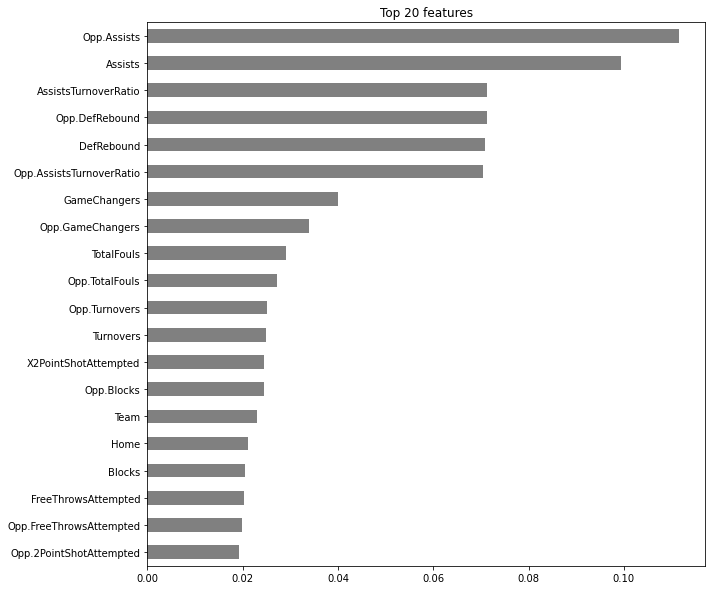

In [56]:
# Get feature importances
rf = gb.named_steps['xgbclassifier']
importances = pd.Series(rf.feature_importances_, X_train.columns)

# Plot feature importances
%matplotlib inline
import matplotlib.pyplot as plt

n = 20
plt.figure(figsize=(10,n/2))
plt.title(f'Top {n} features')
importances.sort_values()[-n:].plot.barh(color='grey');

In [ ]:
 print('Training Accuracy:', gb.score(X_train, y_train))
print('Validation Accuracy:', gb.score(X_val, y_val))

Training Accuracy: 0.9115853658536586
Validation Accuracy: 0.8573170731707317


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='median'), 
    GradientBoostingClassifier(random_state=42)
)


pipeline.fit(X_train, y_train);

In [ ]:
print('Training Accuracy:', pipeline.score(X_train, y_train))
print('Validation Accuracy:', pipeline.score(X_val, y_val))

Training Accuracy: 0.9138211382113821
Validation Accuracy: 0.8613821138211382


In [ ]:
from sklearn.inspection import permutation_importance

pi = permutation_importance(pipeline,
                            X_val,
                            y_val,
                            random_state=42,
                            n_jobs=-1)

In [ ]:
pi.keys()

dict_keys(['importances_mean', 'importances_std', 'importances'])

In [ ]:
#take out the "bad" columns to make model faster, not better

p_importance = pd.DataFrame({'feature' : X_val.columns,
                             'weight'  : pi.importances_mean,
                             'std'     : pi.importances_std})

p_importance.sort_values('weight', ascending=True).head(20)

,feature,weight,std
15,Opp.FieldGoalsAttempted,-0.000407,0.000257
4,FieldGoalsAttempted,-0.000407,0.000575
12,Blocks,-0.000407,0.000445
27,WestOpponent,0.000000,0.000000
1,Date,0.000000,0.000000
19,Opp.OffRebounds,0.000000,0.000000
39,Opp.HighFoul%,0.000000,0.000000
38,HighFoul%,0.000000,0.000000
26,EastOpponent,0.000000,0.000000
8,OffRebounds,0.000000,0.000000


Talk about the features in regards to basketball, explain what you are doing to a non techincal audience with both the model and what you are building

In [ ]:
#talk about it in the instance of casino and vegas sports book

p_importance = pd.DataFrame({'feature' : X_val.columns,
                             'weight'  : pi.importances_mean,
                             'std'     : pi.importances_std})

p_importance.sort_values('weight', ascending=False).head(24)

,feature,weight,std
29,Opp.DefRebound,0.143415,0.008168
28,DefRebound,0.141301,0.010337
37,Opp.AssistsTurnoverRatio,0.083171,0.004779
36,AssistsTurnoverRatio,0.078293,0.007638
25,Opp.TotalFouls,0.006423,0.001614
41,Opp.GameChangers,0.005203,0.001694
13,Turnovers,0.004715,0.001829
40,GameChangers,0.004390,0.000474
30,X2PointShotAttempted,0.004065,0.001763
24,Opp.Turnovers,0.003659,0.001431


In [ ]:
import matplotlib.pyplot as plt

In [ ]:

!pip install pdpbox
!pip install shap

     |████████████████████████████████| 57.7MB 69kB/s 
  Created wheel for pdpbox: filename=PDPbox-0.2.0-cp36-none-any.whl size=57690722 sha256=94b9611561ec86dde388331f6b59433fe863d2db37440119048ab56c4ffd76fb
  Stored in directory: /root/.cache/pip/wheels/7d/08/51/63fd122b04a2c87d780464eeffb94867c75bd96a64d500a3fe
Successfully built pdpbox
     |████████████████████████████████| 276kB 2.6MB/s 
  Created wheel for shap: filename=shap-0.35.0-cp36-cp36m-linux_x86_64.whl size=394135 sha256=bd208550f77f41aa5f4cbbb4d0d3bb3d1f35b2d306394b365bafe75f50c7df1e
  Stored in directory: /root/.cache/pip/wheels/e7/f7/0f/b57055080cf8894906b3bd3616d2fc2bfd0b12d5161bcb24ac
Successfully built shap


In [ ]:
X_val.head()

,Team,Date,Home,Opponent,FieldGoalsAttempted,X3PointShotsAttempted,FreeThrowsAttempted,FreeThrows.,OffRebounds,TotalRebounds,Assists,Steals,Blocks,Turnovers,TotalFouls,Opp.FieldGoalsAttempted,Opp.3PointShotsAttempted,Opp.FreeThrowsAttempted,Opp.FreeThrows.,Opp.OffRebounds,Opp.TotalRebounds,Opp.Assists,Opp.Steals,Opp.Blocks,Opp.Turnovers,Opp.TotalFouls,EastOpponent,WestOpponent,DefRebound,Opp.DefRebound,X2PointShotAttempted,Opp.2PointShotAttempted,HighFreeThrow%,Opp.HighFreeThrow%,HighRebounds,OppHighRebounds,AssistsTurnoverRatio,Opp.AssistsTurnoverRatio,HighFoul%,Opp.HighFoul%,GameChangers,Opp.GameChangers
4920,ATL,2016-10-27,True,WAS,88,26,18,0.778,14,52,28,13,7,21,19,94,20,18,0.722,12,40,25,14,4,19,20,True,False,38,28,62,74,False,False,False,False,1.333333,1.315789,False,False,20,18
4921,ATL,2016-10-29,False,PHI,85,20,23,0.652,6,47,31,11,7,12,14,80,18,15,0.733,4,39,16,9,5,20,20,True,False,41,35,65,62,False,False,False,False,2.583333,0.800000,False,False,18,14
4922,ATL,2016-10-31,True,SAC,79,30,47,0.617,17,43,24,11,6,13,20,75,23,19,0.684,6,38,26,10,6,19,34,False,True,26,32,49,52,False,False,False,False,1.846154,1.368421,False,True,17,16
4923,ATL,2016-11-02,True,LAL,85,32,29,0.793,10,37,30,10,1,18,19,90,22,20,0.900,11,42,24,11,9,15,25,False,True,27,31,53,68,False,True,False,False,1.666667,1.600000,False,False,11,20
4924,ATL,2016-11-04,False,WAS,83,25,36,0.639,10,47,22,12,3,18,24,80,20,35,0.800,11,46,13,7,3,19,23,True,False,37,35,58,60,False,False,False,False,1.222222,0.684211,False,False,15,10


In [ ]:
from pdpbox.pdp import pdp_interact, pdp_interact_plot

features = ['Opp.DefRebound', 'Opp.AssistsTurnoverRatio']

interaction = pdp_interact(
    model=gb,
    dataset=X_val,
    model_features=X_val.columns,
    features=features
)

(<Figure size 756x900 with 5 Axes>,
 {'pdp_inter_ax': {'_pdp_inter_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7fb85ffc77f0>,
   '_pdp_x_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7fb85ffdb6d8>,
   '_pdp_y_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7fb85ff80908>},
  'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7fb862d7fd68>})

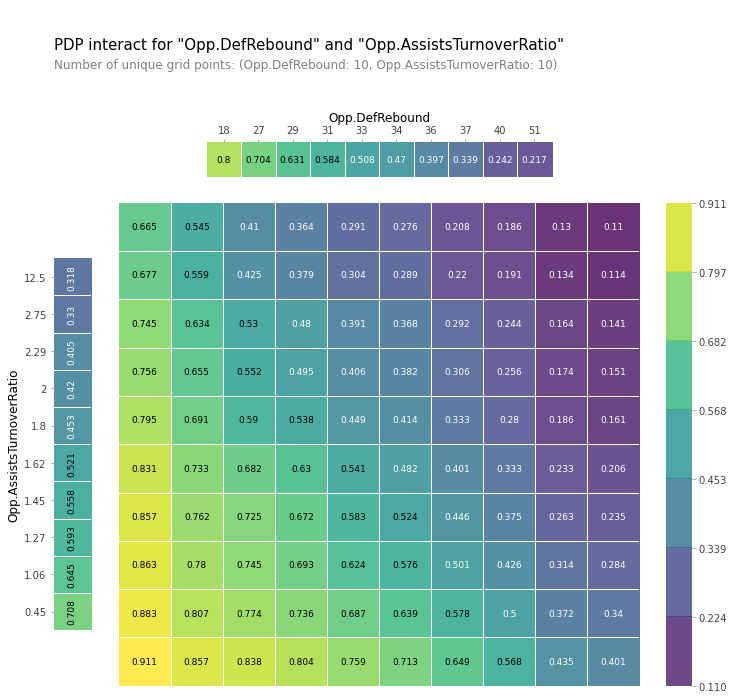

In [ ]:
pdp_interact_plot(interaction, plot_type='grid', feature_names=features, plot_pdp=True)

**The Plot above shows how as Opponents Defense Rebounds begin to increase and their assist turnover ratio increase, the likelyhood of the home team winning decreases expontentially. This makes perfect sense in the game of basketball. As the Opponent accumulates more rebounds, the home team now has less chances to score. Rebounds protect teams from "second chance points", a second chance point means the other team has an opportunity of scoring again on the same possesion.**

(<Figure size 756x900 with 5 Axes>,
 {'pdp_inter_ax': {'_pdp_inter_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7fb862d8d9b0>,
   '_pdp_x_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7fb862d70ba8>,
   '_pdp_y_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7fb862d28ba8>},
  'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7fb862fedc50>})

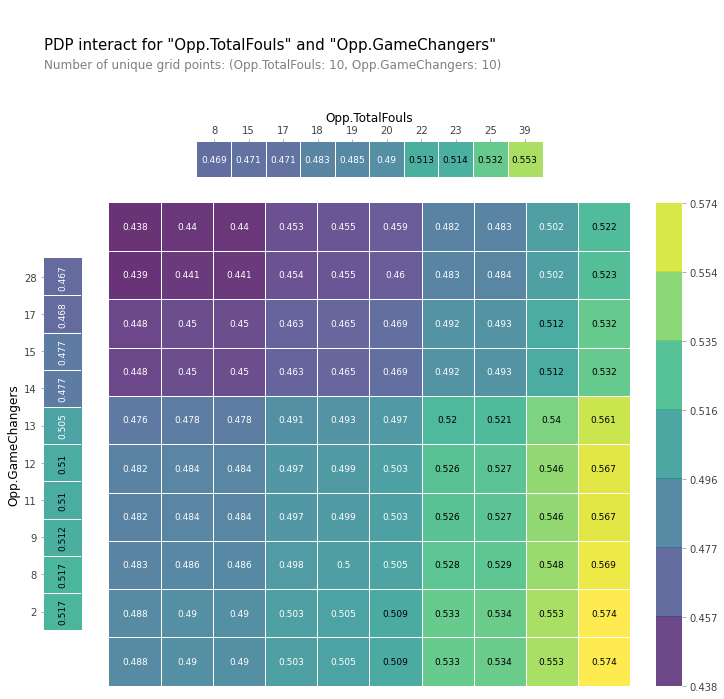

In [ ]:
features = ['Opp.TotalFouls', 'Opp.GameChangers']

interaction = pdp_interact(
    model=gb,
    dataset=X_val,
    model_features=X_val.columns,
    features=features
)

pdp_interact_plot(interaction, plot_type='grid', feature_names=features, plot_pdp=True)

**The Y axis has a label "GameChangers", not this is not a normal term used to describe the features I implemented, however; I believe the name is correct. Steals and Blocks when playing defense give the other team momentum. You not only stopped the other team from scoring, but you didnt even give them the chance to score. When you steal the ball it is deflating to the person you stole it from. When you block someones shot, honestly, it just feels embarassing as the person who shot it. No surprise to me that as the opponents GameChangers increased, so did the Home teams chances of winning. Now what is interesting about this is how important fouls are. An opposing team can have a high accumulation of game changers, but even if they still have high fouls, the home teams chances of winning don't change that much**

In [ ]:
#from scipy.stats import randint, uniform
#from sklearn.ensemble import RandomForestRegressor
#from sklearn.model_selection import RandomizedSearchCV

#param_distributions = { 
    #'n_estimators': randint(50, 500), 
    #'max_depth': [5, 10, 15, 20, None], 
    #'max_features': uniform(0, 1), 
#}

#search = RandomizedSearchCV(
    #RandomForestRegressor(random_state=42), 
    #param_distributions=param_distributions, 
    #n_iter=5, 
    #cv=2, 
    #scoring='neg_mean_absolute_error', 
    #verbose=10, 
    #return_train_score=True, 
    #n_jobs=6, 
    #random_state=42
#)

#search.fit(X_train, y_train);

Fitting 2 folds for each of 5 candidates, totalling 10 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   3 out of  10 | elapsed:    5.0s remaining:   11.7s
[Parallel(n_jobs=6)]: Done   5 out of  10 | elapsed:    5.8s remaining:    5.8s
[Parallel(n_jobs=6)]: Done   7 out of  10 | elapsed:    6.2s remaining:    2.7s
[Parallel(n_jobs=6)]: Done  10 out of  10 | elapsed:    7.3s finished


In [ ]:
#print('Best hyperparameters', search.best_params_)
#print('Cross-validation MAE', -search.best_score_)
#model = search.best_estimator_

Best hyperparameters {'max_depth': 15, 'max_features': 0.020584494295802447, 'n_estimators': 307}
Cross-validation MAE 0.4331990911624236


In [ ]:
#row = X_test.iloc[[0]]
#row

,Assists,Steals,Blocks,Turnovers
7380,20,11,6,13


In [ ]:
#y_test.iloc[[0]]

7380    True
Name: WINNER, dtype: bool

In [ ]:
#model.predict(row)

array([0.48645692])

In [ ]:
#import shap

#explainer = shap.TreeExplainer(model)
#shap_values = explainer.shap_values(row)
#shap.initjs()
#shap.force_plot(
    #base_value=explainer.expected_value,
    #shap_values=shap_values,
    #features=row
#)